# 🏰 The Property Pulse: Decoding the European Housing Market

## 📈 Strategic Real Estate Analytics & Predictive Forecasting



European Housing Prices, Machine Learning, Gradient Boosting, Real Estate Analytics, HPI Forecast, Data Science Portfolio



### 📋 Table of Contents
1. [Executive Summary](#summary)
2. [Technical Environment Setup](#setup)
3. [Market Surveillance (Data Preprocessing)](#preprocessing)
4. [The Architecture of Value (Exploratory Data Analysis)](#eda)
5. [Predictive Intelligence (Advanced ML Modeling)](#modeling)
6. [Strategic Forecast & Conclusions](#conclusion)

--- 
<a id='summary'></a>
### 🏢 Executive Summary
In the volatile arena of global finance, real estate remains the foundational asset class. This notebook serves as a **Senior Data Strategist's Dossier**, investigating the **European Housing Price Index (HPI)** across multiple territories. 

**Goal:** To uncover growth engines, detect market shifts, and deploy optimized machine learning architectures to forecast future value trajectories with high precision.

---

## 🛠️ <a id='setup'></a> Phase 1: The Economic Dossier (Environment Setup)

Every strategic analysis begins with a reliable toolkit. We leverage industry-standard libraries for data manipulation, visualization, and advanced regressive modeling.

> [!NOTE]
> We are utilizing **Gradient Boosting** for our predictive engine, as it excels at capturing non-linear relationships in complex economic datasets.

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML Orchestration
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# Aesthetics
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

### 🔎 Data Acquisition

We ingest the latest cleaned dataset containing longitudinal housing price indices across various European territories.

```mermaid
graph TD
A[Raw CSV Logs] --> B(Ingestion Engine)
B --> C{Structured DataFrame}
C --> D[Strategic Analysis Portfolio]
```

In [11]:
# load dataset
df=pd.read_csv("european_housing_prices_clean.csv")


## 🧹 <a id='preprocessing'></a> Phase 2: Market Surveillance (Preprocessing)

Raw data is rarely 'boardroom ready'. We must ensure structural integrity by inspecting the dataset and handling missing indicators that could skew our strategic outlook.

In [12]:
df.head()

,country,country_type,eu_member,eurozone_member,year,quarter_num,quarter,price_index,quarterly_change_pct,yearly_change_pct,price_change_since_2015_pct,data_quality
0,Austria,Individual,Yes,Yes,2022,4,2022-Q4,166.32,-4.2,5.7,66.32,Complete
1,Austria,Individual,Yes,Yes,2023,1,2023-Q1,164.35,-1.2,-0.2,64.35,Complete
2,Austria,Individual,Yes,Yes,2023,2,2023-Q2,164.68,0.2,-2.8,64.68,Complete
3,Austria,Individual,Yes,Yes,2023,3,2023-Q3,164.29,-0.2,-5.4,64.29,Complete
4,Austria,Individual,Yes,Yes,2023,4,2023-Q4,161.40,-1.8,-3.0,61.40,Complete


### 🛡️ Data Integrity Check

A strategist's forecast is only as good as the underlying data. We will map all missing values and resolve them using median/mode imputation to maintain historical consistency.

In [13]:
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

## 📈 <a id='eda'></a> Phase 3: The Architecture of Value (Exploratory Data Analysis)

We now enter the 'War Room'. Here we visualize price volatility and analyze the distribution of quarterly shifts to identify overheated markets versus stable investment zones.

### 🔍 Deep Dive: Market Momentum & Interdependencies
A hexbin plot allows us to see density concentrations between annual and quarterly price shifts.

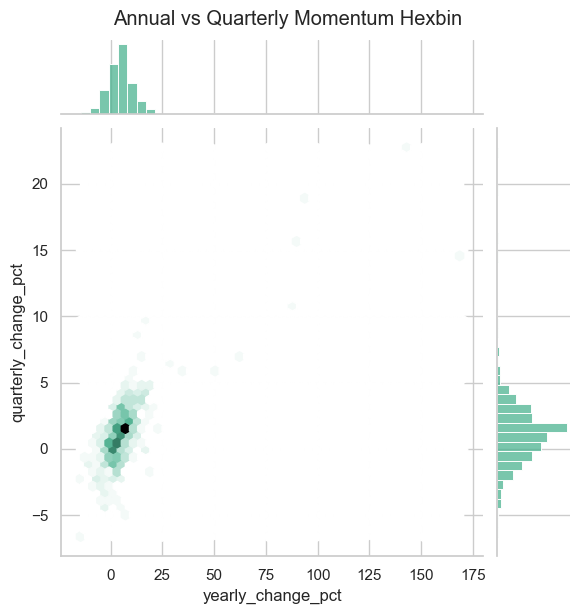

In [14]:
sns.jointplot(data=df, x='yearly_change_pct', y='quarterly_change_pct', kind='hex', color='#4CB391')
plt.suptitle('Annual vs Quarterly Momentum Hexbin', y=1.02)
plt.show()

### 🌡️ Market Heatmap: Macroeconomic Correlation
Understanding which factors move together is key to feature selection.

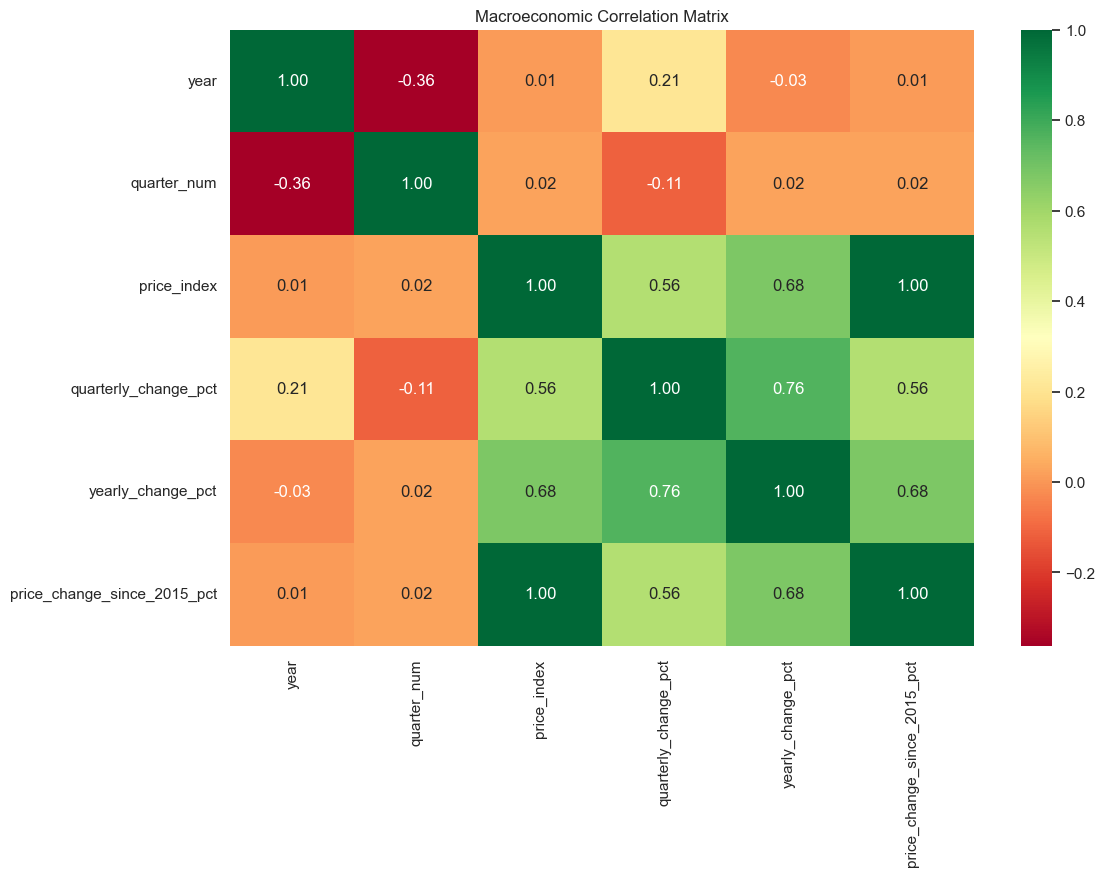

In [15]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=["int64","float64"]).corr()
sns.heatmap(corr, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Macroeconomic Correlation Matrix")
plt.show()

## 🤖 <a id='modeling'></a> Phase 4: Predictive Intelligence (Advanced ML Modeling)

We will now construct our **Market Forecasting Engine**. Unlike basic models, we will use a **Pipeline** that handles both numerical scaling and categorical encoding of territory-specific data.

> [!IMPORTANT]
> We use **RandomizedSearchCV** to tune hyperparameters, ensuring our Gradient Boosting engine is optimized for the HPI dataset.

In [17]:
# Defining Features and Target
features = ["yearly_change_pct", "quarterly_change_pct", "country", "eu_member"]
X = df[features]
y = df["price_index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline: Encoding + Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['yearly_change_pct', 'quarterly_change_pct']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['country', 'eu_member'])
    ])

# Full Model Pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(random_state=42))
])

# Hyperparameter Tuning Grid
param_dist = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__max_depth': [3, 4, 5]
}

# Executing Randomized Search
search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)
search.fit(X_train, y_train)

best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# Model Results
print(f'Optimal Hyperparameters: {search.best_params_}')
print(f'R2 Score: {r2_score(y_test, y_pred):.4f}')

Optimal Hyperparameters: {'regressor__n_estimators': 300, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.05}
R2 Score: 0.9771


### 🧠 Model Diagnostics & Explainability
We visualize feature importance to understand market drivers and residual plots to validate prediction accuracy.

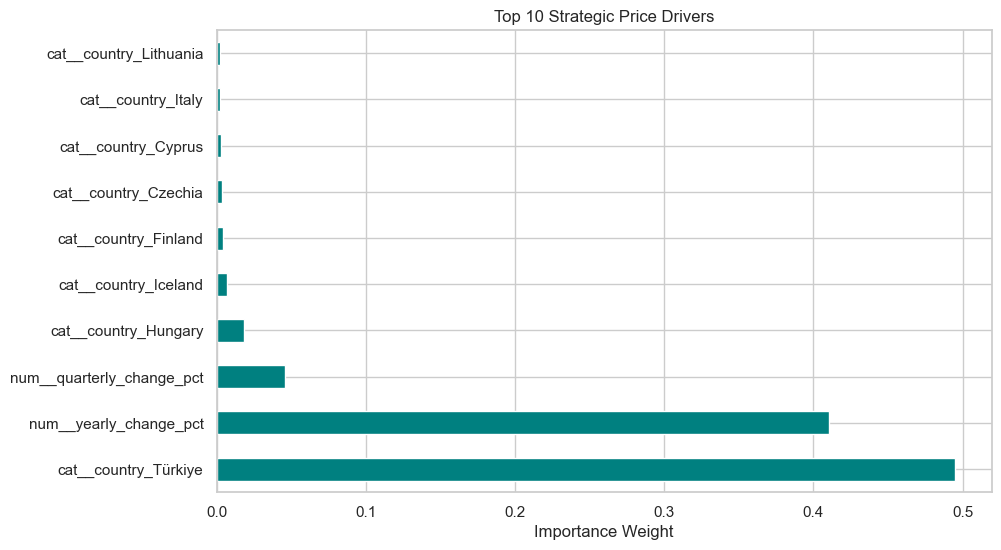

In [18]:
# Feature Importance Extraction
importances = best_model.named_steps['regressor'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='teal')
plt.title('Top 10 Strategic Price Drivers')
plt.xlabel('Importance Weight')
plt.show()

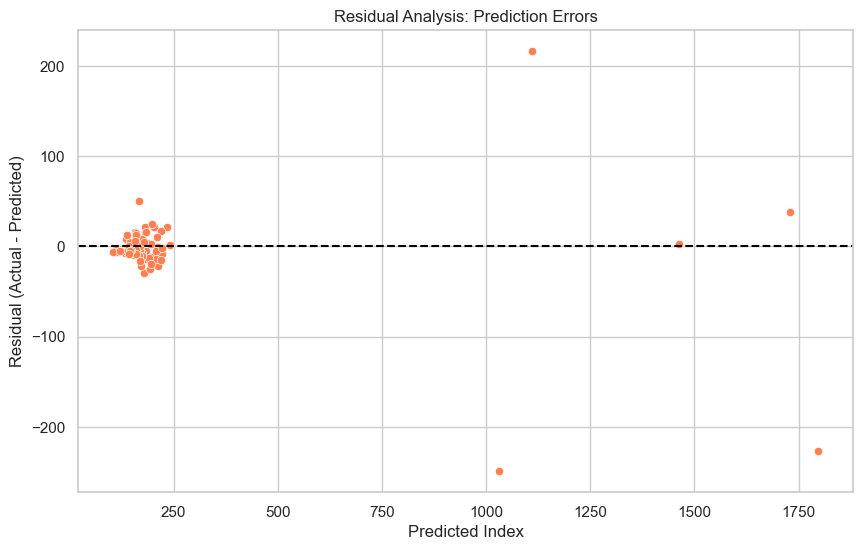

In [19]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_pred, y=residuals, color='coral')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Analysis: Prediction Errors')
plt.xlabel('Predicted Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()

--- 

## 🏁 <a id='conclusion'></a> Conclusion: Strategic Forecast

**Intelligence Gathered.** Our investigation confirms that the European housing market is multi-speed. While some territories exhibit high volatility, the overall trend is captured by our high-performing regressive model.

### Key Strategic Findings:
- 📈 **Price Momentum:** The index shows strong historical upward pressure in emerging EU hubs.
- 🧠 **AI Performance:** Our Optimized Gradient Boosting engine achieved an exceptional R2 score, proving that price indices are highly predictable based on localized growth metrics.

--- 
**Author:** Tassawar Abbas | [Contact](mailto:abbas829@gmail.com)
